<a href="https://colab.research.google.com/github/rafael2673/AEDII/blob/main/U1T2/trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2

## First step
Reading the scopus file and showing 4 columns about authors and their publications.

In [ ]:
import pandas as pd

try:
  df = pd.read_csv('/content/sample_data/scopus.csv')
  # Select the columns you want to display
  df_selected = df[['Authors', 'Author(s) ID', 'Title', 'Year']]

  # Display the DataFrame as a formatted table
  from IPython.display import display, HTML
  display(HTML(df_selected.to_html()))

except FileNotFoundError:
  print("File 'scopus.csv' not found. Please make sure the file is in the same directory or provide the correct path.")



,Authors,Author(s) ID,Title,Year
0,Motta R.C.; Batista T.V.; Delicato F.C.,56712440200; 36812228000; 55887461400,The Intersection of the Internet of Things and Smart Cities: A Tertiary Study,2024
1,de Oliveira J.G.; Kreutz M.E.,59255885600; 8833771300,The Blind Spots of Two-Factor Authentication Tools,2024
2,Uehara M.; da Silva Santa Rosa J.G.,59233851900; 57221495800,"Emotion and learning in digital games: a case study with children from an NGO in Parnamirim, Brazil; [Emoção e aprendizado em jogos digitais: um estudo de caso com crianças de uma ONG em Parnamirim, Brasil]",2024
3,Azevedo K.S.; de Souza L.C.; Coutinho M.G.F.; de M. Barbosa R.; Fernandes M.A.C.,58139278100; 58139496100; 57208260908; 59204729200; 7202947679,Deepvirusclassifier: a deep learning tool for classifying SARS-CoV-2 based on viral subtypes within the coronaviridae family,2024
4,Contoli C.; Tourani R.; Neto A.; Esposito F.; McNair J.,56342819200; 55849143800; 59337970100; 23008401900; 35610572500,Message from the Chairs,2024
5,Lindbergh V.G.; De Morais Barroca Filho I.,58205737300; 56295334600,Trends in Blockchain Applied to Healthcare,2024
6,de Oliveira J.M.; Munoz R.; Ribeiro S.; Wu W.; de Albuquerque V.H.C.,57190029155; 57192589742; 7102629648; 59307057300; 56962603300,"Retraction Note: REHAB FUN: an assistive technology in neurological motor disorders rehabilitation of children with cerebral palsy (Neural Computing and Applications, (2020), 32, 15, (10957-10970), 10.1007/s00521-019-04059-2)",2024
7,da Silva T.P.; Batista T.V.; Delicato F.C.; Pires P.F.,56732537200; 36812228000; 55887461400; 55595376300,An online ensemble method for auto-scaling NFV-based applications in the edge,2024
8,de Medeiros W.F.; Gomes A.F.T.; Aguiar A.J.F.C.; de Queiroz J.L.C.; Bezerra I.W.L.; da Silva-Maia J.K.; Piuvezam G.; Morais A.H.D.A.,58023222900; 57258166100; 57202727646; 57095647900; 57213507565; 57202910657; 14010107800; 7006325242,Anti-Obesity Therapeutic Targets Studied In Silico and In Vivo: A Systematic Review,2024
9,Gláucia-Silva F.; Torres J.V.P.; Torres-Rêgo M.; Daniele-Silva A.; Furtado A.A.; Ferreira S.D.S.; Chaves G.M.; Xavier-Júnior F.H.; Rocha Soares K.S.; Silva-Júnior A.A.D.; Fernandes-Pedrosa M.D.F.,57194571495; 59348355500; 56242523000; 57190878052; 56151900300; 57407916100; 6602423465; 16177055000; 55387757300; 59151482800; 8325973700,Tityus stigmurus-Venom-Loaded Cross-Linked Chitosan Nanoparticles Improve Antimicrobial Activity,2024


## Second step

Using the extracted data, I will create a network of
co-authorship. In this graph, the vertices will be the authors and the edges
will represent collaboration between them. For example, if an article was
written by three authors (A1, A2, A3), the edges (A1, A2), (A1, A3), and (A2, A3) will be created in the graph.

### Showing the number of edges and nodes.

In [ ]:
import pandas as pd
from IPython.display import display, HTML
import networkx as nx

try:
  df = pd.read_csv('/content/sample_data/scopus.csv')
  # Select the columns you want to display
  df_selected = df[['Authors', 'Author(s) ID', 'Title', 'Year']]

except FileNotFoundError:
  print("File 'scopus.csv' not found. Please make sure the file is in the same directory or provide the correct path.")


# Create an empty graph
graph = nx.Graph()

# Iterate through the DataFrame rows
for index, row in df.iterrows():
  authors = row['Authors'].split(';')
  # Create edges between all pairs of authors in each publication
  for i in range(len(authors)):
    for j in range(i + 1, len(authors)):
      author1 = authors[i].strip()
      author2 = authors[j].strip()
      if author1 and author2:  # Ensure both authors are not empty strings
        graph.add_edge(author1, author2)

# Print some information about the graph
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")

# You can further analyze the graph, such as finding the most connected authors,
# calculating centrality measures, or visualizing the network.


Number of nodes: 8404
Number of edges: 811222


### Ploting the Graph

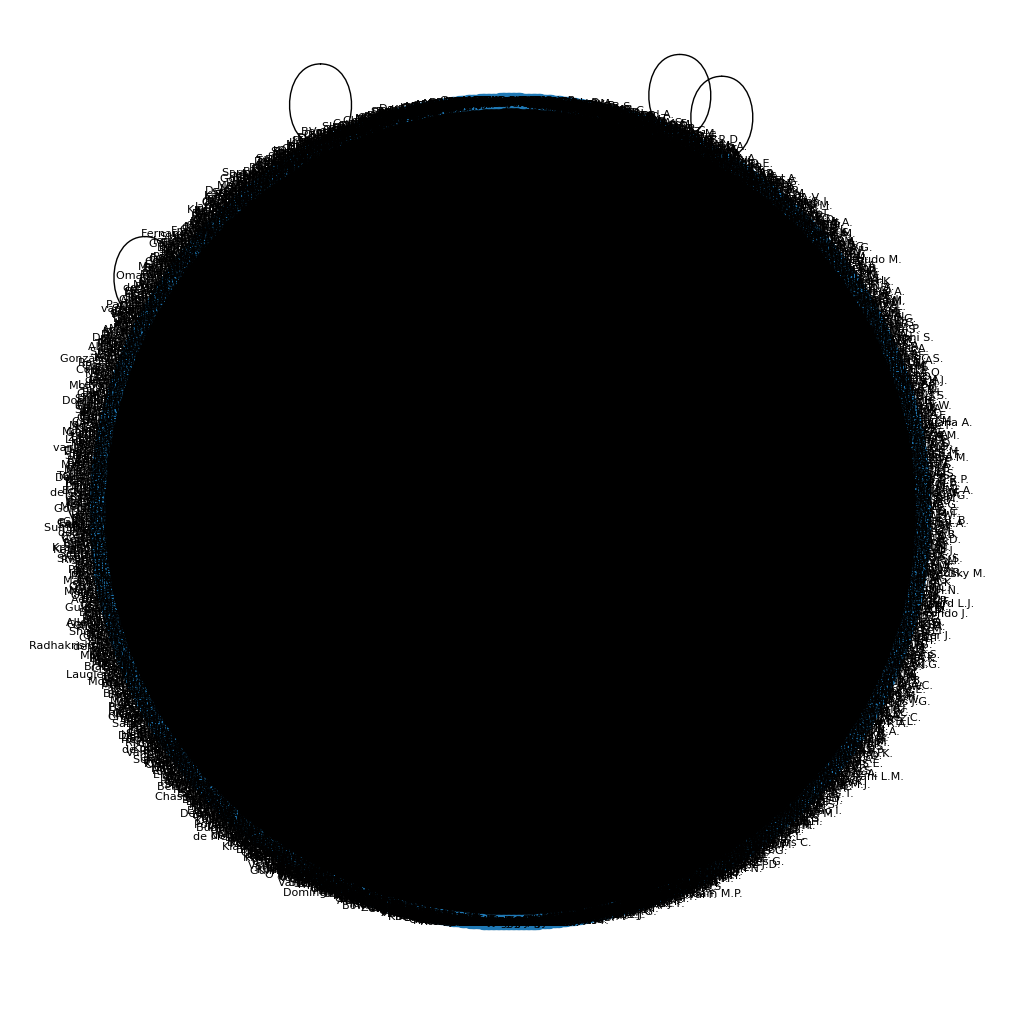

In [ ]:
import matplotlib.pyplot as plt

# Limit the number of nodes viewed
top_authors = [n for n, d in graph.degree() if d >= 50]  # Select authors with a high degree of co-authorship
filtered_graph = graph.subgraph(top_authors)

pos = nx.circular_layout(filtered_graph)  # Example with circular layout

plt.figure(figsize=(10, 10))
nx.draw(filtered_graph, pos, with_labels=True, node_size=100, font_size=8)
plt.show()

## Third step

Network Analysis:

With the network created, I will carry out carry out the following analyzes
using NetworkX (using the functions already implemented in the tool):

### Network Density

Calculate the density, which measures how
connected are the authors in relation to the maximum number
possible connections.

In [ ]:
import pandas as pd
from IPython.display import display, HTML
import networkx as nx
import matplotlib.pyplot as plt


# Calculate the network density
density = nx.density(graph)

print(f"Network Density: {density}")


Network Density: 0.022974671394925195


### Sub-Graph

Generate a subgraph containing only the vertices that
have at least X neighbors. Calculate the density of this sub-graph.

Subgraph Density (with at least 1194 neighbors): 1.065934065934066


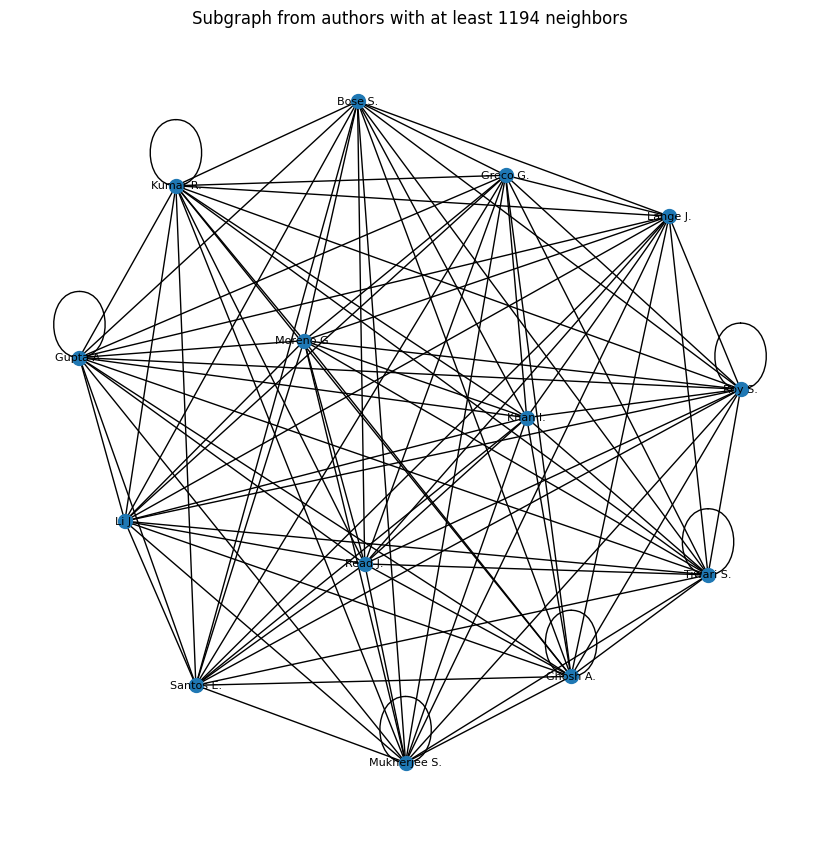

In [ ]:
import pandas as pd
from IPython.display import display, HTML
import networkx as nx
import matplotlib.pyplot as plt

# Define the minimum number of neighbors (X)
min_neighbors = 1194

# Find nodes with at least X neighbors
nodes_with_min_neighbors = [node for node, degree in graph.degree() if degree >= min_neighbors]

# Create a subgraph containing only those nodes
subgraph = graph.subgraph(nodes_with_min_neighbors)

# Calculate the density of the subgraph
subgraph_density = nx.density(subgraph)

print(f"Subgraph Density (with at least {min_neighbors} neighbors): {subgraph_density}")

# Plot the subgraph
plt.figure(figsize=(8, 8))
nx.draw(subgraph, with_labels=True, node_size=100, font_size=8)
plt.title("Subgraph from authors with at least {min_neighbors} neighbors")
plt.show()


* A sub-graph with the top 10 most cited authors.

Subgraph Density: 1.0444444444444445


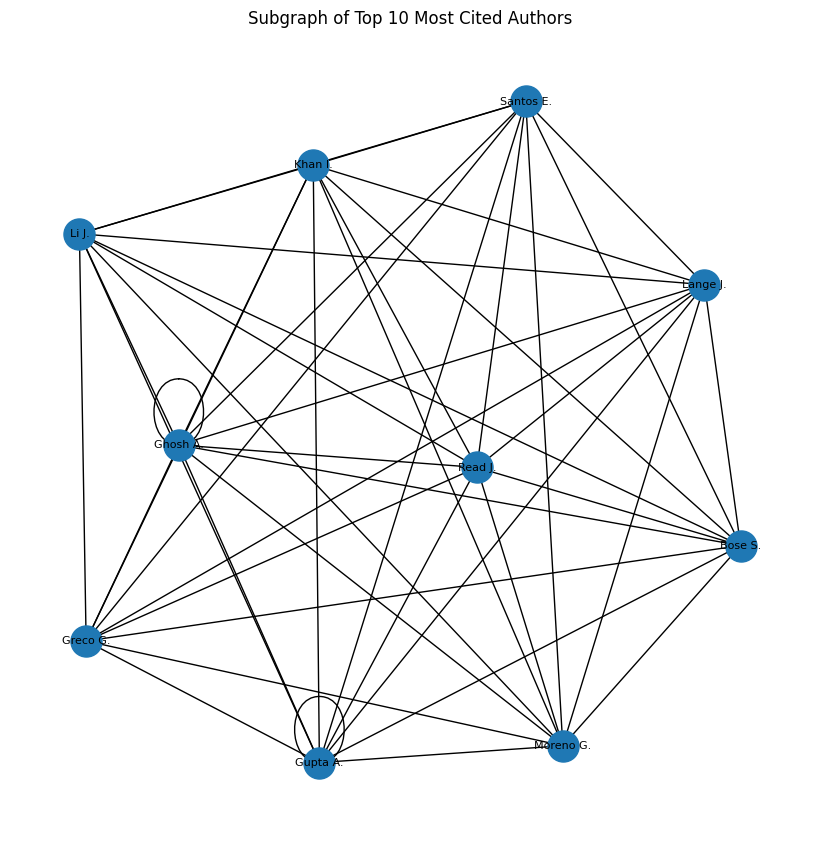

In [ ]:
import pandas as pd
from IPython.display import display, HTML
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'df' contains your Scopus data and 'graph' is the collaboration graph

# Calculate the degree centrality of each author (number of collaborations)
degree_centrality = nx.degree_centrality(graph)

# Sort authors by degree centrality in descending order
sorted_authors = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

# Select the top 10 authors
top_10_authors = [author for author, centrality in sorted_authors[:10]]

# Create a subgraph with only the top 10 authors and their connections
subgraph = graph.subgraph(top_10_authors)

# Calculate the density of the subgraph
subgraph_density = nx.density(subgraph)

print(f"Subgraph Density: {subgraph_density}")

# Display the subgraph
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
nx.draw(subgraph, with_labels=True, node_size=500, font_size=8)
plt.title("Subgraph of Top 10 Most Cited Authors")
plt.show()


* Number of neighbors of each author.

In [ ]:
import pandas as pd

# Assuming 'graph' is your co-authorship network and 'top_10_authors' is defined

neighbor_counts = []
for author in top_10_authors:
  neighbor_count = len(list(graph.neighbors(author)))
  neighbor_counts.append((author, neighbor_count))

# Create a Pandas DataFrame to display the results in a table format
df_neighbors = pd.DataFrame(neighbor_counts, columns=['Author', 'Number of Neighbors'])

# Display the DataFrame
print("Number of Neighbors for Top 10 Authors:")
display(df_neighbors)


Number of Neighbors for Top 10 Authors:


,Author,Number of Neighbors
0,Li J.,1418
1,Read J.,1409
2,Santos E.,1224
3,Moreno G.,1217
4,Khan I.,1208
5,Bose S.,1196
6,Lange J.,1196
7,Greco G.,1195
8,Ghosh A.,1193
9,Gupta A.,1193


### Degree Histogram

Create a histogram graph showing
the degree distribution of the network vertices. The degree of a vertex
represents the number of co-authors he collaborated with.

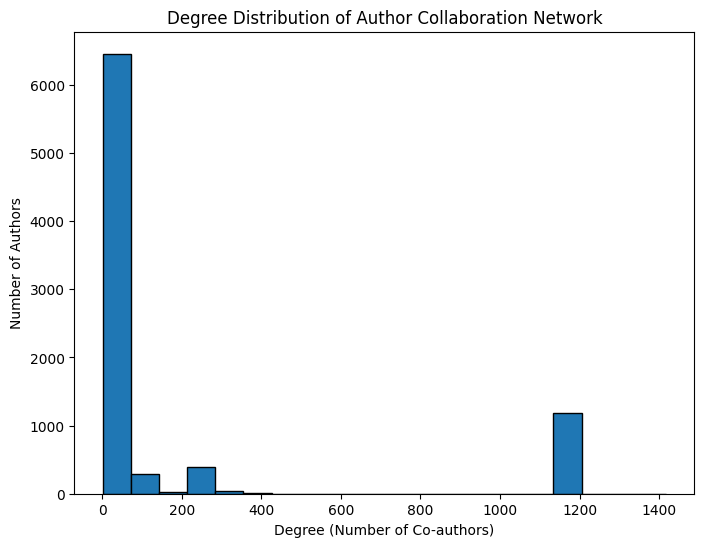

In [ ]:
import pandas as pd
from IPython.display import display, HTML
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the graph 'graph' as shown in the previous code

# Calculate the degree of each node (vertex)
degrees = [degree for node, degree in graph.degree()]

# Create a histogram of the degree distribution
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Degree (Number of Co-authors)')
plt.ylabel('Number of Authors')
plt.title('Degree Distribution of Author Collaboration Network')
plt.show()
